In [417]:
from read_input2 import read_input
import math
import numpy
import time
import matplotlib.pyplot as plt
import random


## Lecture des données

In [404]:
start_time = time.time()

ville="Poland" #  changer 
ressources,ressources_unavailabilities,tasks,tasks_unavailabilities = read_input(1,ville)
# "Bordeaux", "Finland", "GuineaGolf", "Italy", "Poland"

In [405]:
def dist(lat1, long1, lat2, long2):
    """
    fonction renvoyant la distance en kms entre deux points décrits par leur latitude et longitude
    """
    if lat1==lat2 and long1==long2:
        return 0
    return(numpy.arccos(numpy.sin(2*numpy.pi/360*lat1)*numpy.sin(2*numpy.pi/360*lat2)+numpy.cos(2*numpy.pi/360*lat1)*numpy.cos(2*numpy.pi/360*lat2)*numpy.cos(2*numpy.pi/360*(long2-long1)))*6371)

v=5/6

L_ressources = [j for j in ressources] # tableau des objets ressources 
L_tasks = [i for i in tasks] # tableau des objets taches
number_of_ressources = len(L_ressources)
number_of_tasks = len(L_tasks)
dict_pos = {task : (task.latitude, task.longitude) for task in tasks.values()}

dict_pos = {task : (tasks[L_tasks[task]].latitude, tasks[L_tasks[task]].longitude) for task in range(number_of_tasks)}

#distance[a][b] donne la distance de la tâche a vers la tâche b
distances = [[dist(tasks[L_tasks[a]].latitude,tasks[L_tasks[a]].longitude, tasks[L_tasks[b]].latitude, tasks[L_tasks[b]].longitude) for b in range(number_of_tasks)] for a in range(number_of_tasks)]

#distance_m[j][i] donne la distance de la maison de j la tâche i
distances_m = [[dist(ressources[L_ressources[j]].latitude,ressources[L_ressources[j]].longitude, tasks[L_tasks[i]].latitude, tasks[L_tasks[i]].longitude) for i in range(number_of_tasks)] for j in range(number_of_ressources)]

## Functions

In [406]:
def generate_time(task_list):
    """
    input : list of tasks indices
    output : list of integers
    generates a time table from a list of ordered tasks
    # trajets debut et fin de journee
    """
    time=[]
    time.append(tasks[L_tasks[task_list[0]]].openingTime)
    for i in range(1,len(task_list)):
        time.append(max((tasks[L_tasks[task_list[i]]].openingTime,time[-1]+distances[task_list[i]][task_list[i-1]]/v+tasks[L_tasks[task_list[i-1]]].duration)))
    return(time)



In [407]:
def employees_by_level():
    """
    output : list of employees ids from level 1 to level 3
    """
    employees=[]
    for i in range(number_of_ressources):
        if ressources[L_ressources[i]].level==1:
            employees.append(i)
    for i in range(number_of_ressources):
        if ressources[L_ressources[i]].level==2:
            employees.append(i)
    for i in range(number_of_ressources):
        if ressources[L_ressources[i]].level==3:
            employees.append(i)
    return(employees)


In [408]:
def tasks_by_level():
    """
    output : list of tasks ids from level 1 to level 3
    """
    ordered_tasks=[]
    for i in range(number_of_tasks):
        if tasks[L_tasks[i]].level==1:
            ordered_tasks.append(i)
    for i in range(number_of_tasks):
        if tasks[L_tasks[i]].level==2:
            ordered_tasks.append(i)
    for i in range(number_of_tasks):
        if tasks[L_tasks[i]].level==3:
            ordered_tasks.append(i)
    return(ordered_tasks)

In [409]:
def is_feasible(employee,task_list,hours_list):
    """
    input : employee id, employee task list (by id), employee hours list (by id)
    true if feasible
    # add tasks and ressources unavailabilities
    # trajets debut et fin de journee
    """
    if hours_list[-1]+tasks[L_tasks[task_list[-1]]].duration>ressources[L_ressources[employee]].workingEnd:
        return False
    return True

In [410]:
def initial_task_assignement(ordered_tasks, ordered_employees):
    """
    output : list of the unattributed tasks (by id)
    modifies the attributes tasks and hours of the ressources to assign tasks to the employees
    # change the algo to avoid holes in the timetables
    """
    unattributed_tasks=[]
    for t in ordered_tasks:
        unattributed = True
        r=0
        while unattributed and r<len(ordered_employees):
            if ressources[L_ressources[ordered_employees[r]]].level>=tasks[L_tasks[t]].level:
                tasks_tmp = ressources[L_ressources[ordered_employees[r]]].tasks.copy()
                tasks_tmp.append(t)
                hours_tmp = generate_time(tasks_tmp)
                if is_feasible(r,tasks_tmp,hours_tmp):
                    ressources[L_ressources[ordered_employees[r]]].tasks = tasks_tmp
                    ressources[L_ressources[ordered_employees[r]]].hours = hours_tmp
                    unattributed=False
            r+=1
        if unattributed:
            unattributed_tasks.append(t)
    
    return(unattributed_tasks)

In [416]:
def mutation_intra(r):
    """
    input : r, employee id
    modifies the attributes tasks and hours of an employee to optimize his distances
    # switch at the beginning or at the end of day 
    # faire plein de mutations au début et de moins en moins après
    """
    i = 0
    while i<100:
        tasks_list = ressources[L_ressources[ordered_employees[r]]].tasks.copy() + ["start", "end"]
        ids = random.sample(tasks_list,2)
        a,b = ids[0],ids[1]
        if a=="start" and b!="end":
            tasks_list = ressources[L_ressources[ordered_employees[r]]].tasks.copy()
            tasks_list.remove(b)
            tasks_list = [b] + tasks_list
        elif b=="start" and a!="end":
        elif a!="start" and a!="end" and b!="start" and b!="end":

        
        i+=1

SyntaxError: unexpected EOF while parsing (316762757.py, line 1)

## Main code

In [411]:
ordered_tasks = tasks_by_level()
ordered_employees = employees_by_level()

# first task assignement generation
unattributed_tasks = initial_task_assignement(ordered_tasks, ordered_employees)

for r in range(number_of_ressources):
    assert len(ressources[L_ressources[ordered_employees[r]]].tasks) == len(ressources[L_ressources[ordered_employees[r]]].hours)

# mutations

start_time = time.time()
evolving = True
i = 0
while evolving and time_exec < 60*30:

    # mutation intra


    # mutation inter

    time_exec = time.time() - start_time
    i+=1


## Checkers

In [412]:
# check que les techniciens ont le bon niveau et les bonnes compétences pour les tâches exécutées
a = True
for i in range(number_of_ressources):
    for j in range(number_of_tasks):
        if j in ressources[L_ressources[i]].tasks :
            # check que le skill est bon
            if ressources[L_ressources[i]].skill!=tasks[L_tasks[i]].skill:
                print("fail r,t ",i,j)
                a = False
            # check que le level est bon
            if ressources[L_ressources[i]].level < tasks[L_tasks[j]].level:
                print("fail r,t ",i,j)
                a = False
if a :
    print("Les techniciens ont bien les bonnes compétences et le bon niveau pour toutes les tâches exécutées")

Les techniciens ont bien les bonnes compétences et le bon niveau pour toutes les tâches exécutées


## Solution visualisation

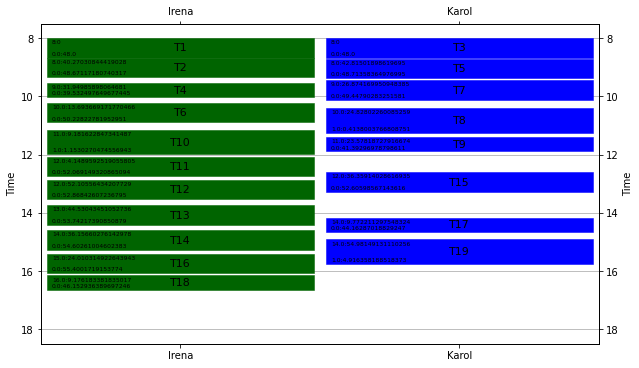

In [413]:
list_colors = ['darkgreen', 'blue', 'red', 'green', 'darkpurple', 'lightred', 'purple', 'pink', 'orange', 'darkblue', 'gray', 'darkred']
list_light_colors = ['lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow','lightblue','lightgreen','pink','lightcyan','violet','lightyellow']


operators=[L_ressources[r] for r in range(number_of_ressources)]
colors=list_colors[0:number_of_ressources]
light_colors=list_light_colors[0:number_of_ressources]

fig=plt.figure(figsize=(10,5.89))

# Set Axis
ax=fig.add_subplot(111)
ax.yaxis.grid()
ax.set_xlim(0.5,len(operators)+0.5)
ax.set_ylim(18.5, 7.5)
ax.set_xticks(range(1,len(operators)+1))
ax.set_xticklabels(operators)
ax.set_ylabel('Time')

# Set Second Axis
ax2=ax.twiny().twinx()
ax2.invert_yaxis()
ax2.set_xlim(ax.get_xlim())
ax2.set_ylim(ax.get_ylim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(operators)
ax2.set_ylabel('Time')

for r in range(number_of_ressources):
    color_r = colors[r]
    light_color_r = light_colors[r]
    operator_room = r+1-0.48
    for a in range(number_of_tasks):
        if a in ressources[L_ressources[r]].tasks :
            event="T"+str(a+1)
            i = ressources[L_ressources[r]].tasks.index(a)
            start = ( ressources[L_ressources[r]].hours[i] )/60
            end = (ressources[L_ressources[r]].hours[i]+tasks[L_tasks[a]].duration)/60
            plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=color_r, edgecolor='k', linewidth=0.5)
            plt.text(operator_room+0.02, start+0.05 ,'{}:{}'.format(ressources[L_ressources[r]].hours[i]//60, ressources[L_ressources[r]].hours[i]%60), va='top', fontsize=6)
            plt.text(operator_room+0.02, end-0.05,'{}:{}'.format((start+tasks[L_tasks[a]].duration)//60, (start+tasks[L_tasks[a]].duration)%60), va='bottom', fontsize=6)
            plt.text(operator_room+0.48, (start+end)*0.5, event, ha='center', va='center', fontsize=11)
        #for b in range(number_of_tasks):
        #    if round(y[(r,a,b)].x) == 1:
        #        start = (int(s[a].x)+tasks[L_tasks[a]].duration)/60
        #        end = start+(distances[a][b]/v)/60
        #        print((start,end))
        #        plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=light_color_r, edgecolor='k', linewidth=0.5)
        #if round(d[(r,a)].x) == 1:
        #    start = (s[a].x-distances_m[r][a]/v)/60
        #    end = s[a].x/60
        #    plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=light_color_r, edgecolor='k', linewidth=0.5)
        #if round(f[(r,a)].x) == 1:
        #    start=(s[a].x + tasks[L_tasks[a]].duration)/60
        #    end=start+(distances_m[r][a]/v)/60
        #    plt.fill_between([operator_room, operator_room+0.96], [start, start], [end,end], color=light_color_r, edgecolor='k', linewidth=0.5)

plt.savefig('timetable_{}_V1.png'.format(ville), dpi=500, transparent=False)
plt.show()

In [414]:
unattributed_tasks

[]